### IE 7275 - Assignment 2 - Explonatory Data Analysis & Feature selection 

In [13]:
from datetime import date
studentName="Qi Li"
studentEmail="li.qi8@northeastern.edu"
homework=2
contributedPercentage=100
print("IE 7275: Data mining in Engineering")
print("\n"*15)
print(f'Homework - {homework}')
print(f'Student name :{studentName}')
print(f'Student Email :{studentEmail}')
print("\n"*15)
print(f'Percentage of Effort Contributed by Student : {contributedPercentage}%')
print(f'Submission Date: {date.today()}')

IE 7275: Data mining in Engineering
















Homework - 2
Student name :Qi Li
Student Email :li.qi8@northeastern.edu
















Percentage of Effort Contributed by Student : 100%
Submission Date: 2023-02-28


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
from sklearn.feature_selection import f_regression
import matplotlib.pylab as plt
%matplotlib inline
import statsmodels.api as sm

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

import warnings
warnings.filterwarnings('ignore')

### a) Show how to understand the variables and show their relationship using visualization and table format 

i) Descriptive statistics ii) Missing values iii) Duplicate data iv) Outlier detections v) Imputations vi) Correlation analysis 

In [15]:
# i) Descriptive statistics
df = pd.read_csv(r'/Users/liqi/Desktop/IE7275/Assignment/Assignment 2/healthcaredata.csv')

# dimensions
print("Dimensions: ", df.shape, "\n")

# data types
print(df.info(), "\n")

# List first 5 records
df.head()

Dimensions:  (1338, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None 



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
# ii) find the missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
# iii) find the duplicate data
print(df.duplicated().sum())
df[df.duplicated()]

1


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [18]:
# delete duplicate data
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [29]:
# iv) Outlier detections: 
# create a funtion to find outliers in bmi
q1 = df['bmi'].quantile(0.25) 
q3 = df['bmi'].quantile(0.75) 
iqr = q3-q1 
low  = q1-1.5*iqr 
high = q3+1.5*iqr 
df_bmi_include = df.loc[(df['bmi'] >= low) & \
                                (df['bmi'] <= high)]
df_bmi_exclude = df.loc[(df['bmi'] < low) | \
                               (df['bmi'] > high)]
# show the number of outliers
print(df_bmi_include.shape)
print(df_bmi_exclude.shape)

(1328, 7)
(9, 7)


In [20]:
# create a funtion to find outliers in charges
q1 = df['charges'].quantile(0.25) 
q3 = df['charges'].quantile(0.75) 
iqr = q3-q1 
low  = q1-1.5*iqr 
high = q3+1.5*iqr 
df_charges_include = df.loc[(df['charges'] >= low) & \
                                (df['charges'] <= high)]
df_charges_exclude = df.loc[(df['charges'] < low) | \
                               (df['charges'] > high)]
# show the number of outliers
print(df_charges_include.shape)
print(df_charges_exclude.shape)

(1198, 7)
(139, 7)


We can see that there are 9 outliers in terms of bmi and 139 outliers in terms of charges. After finding the ouliers, we need to imputate the outliers

In [21]:
# v) Imputations: imputate the outliers with mean
bmi_mean = df_bmi_include.bmi.mean()
print(bmi_mean)

charges_mean = df_charges_include.charges.mean()
print(charges_mean)

df_bmi_exclude.bmi = bmi_mean
df_charges_exclude.charges = charges_mean

#df_rev = pd.concat([df_bmi_include,df_bmi_exclude])
#df_rev.shape

30.53730798192771
9934.671757970786


<AxesSubplot: >

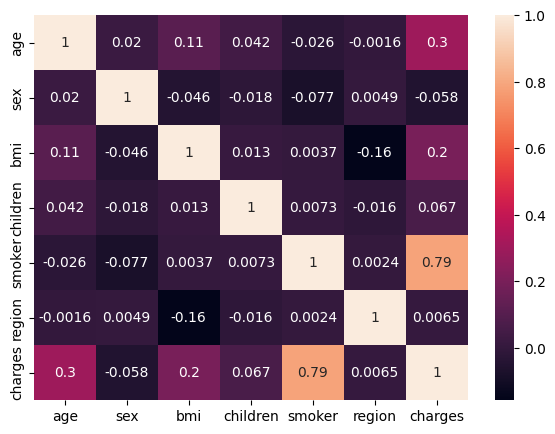

In [80]:
# vi) Correlation analysis: show the correlation in table and in heatmap.
df.corr()
plt.figure(figsize = (7,5))
sns.heatmap(df.corr(), annot = True)

We can see from the table and the plot that in terms of charges: it has a strong and positive correlation with age and bmi but weak correlation with children. In terms of bmi: it has a strong and positive correlation with age and charges.

### b) Feature engineering (10 points)

Analyze each numeric feature distribution for categorical variables using table and visualization format. Hint: How is the variable smoke distribution against age,  gender, etc.?

In [27]:
# show the unique region and unique children number
display(df.region.unique())
display(df.children.unique())
display(df['region'].value_counts(ascending = False))
display(df['children'].value_counts(ascending = False))

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

array([0, 1, 3, 2, 5, 4])

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

,children,smoker,count
0,0,0,458
1,0,1,115
2,1,0,263
3,1,1,61
4,2,0,185
5,2,1,55
6,3,0,118
7,3,1,39
8,4,0,22
9,4,1,3


([<matplotlib.axis.XTick at 0x7fbf2454ae50>,
 [Text(0, 0, 'no'), Text(1, 0, 'yes')])

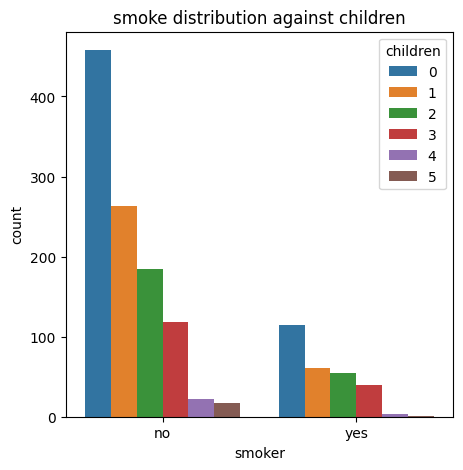

In [75]:
# show smoke distribution against children
df_0_smoke = df[df['children']== 0]['smoker'].value_counts()
df_1_smoke = df[df['children']== 1]['smoker'].value_counts()
df_2_smoke = df[df['children']== 2]['smoker'].value_counts()
df_3_smoke = df[df['children']== 3]['smoker'].value_counts()
df_4_smoke = df[df['children']== 4]['smoker'].value_counts()
df_5_smoke = df[df['children']== 5]['smoker'].value_counts()

# group them by the number of children and show in table
df_smoke = df.groupby(['children', 'smoker'])['age'].count().reset_index()
df_smoke = df_smoke.rename(columns={'age': 'count'})
display(df_smoke)

# show in plot
sns.barplot(df_smoke, x = 'smoker', y = 'count', hue = 'children')
plt.title('smoke distribution against children')
plt.xticks(ticks = [0,1], labels=['no', 'yes'])

We can see from the above plot that people who have children smoke less than people who don't have children and also people who have more children smoke less than people who have less children.

,sex,smoker,count
0,0,0,516
1,0,1,159
2,1,0,547
3,1,1,115


([<matplotlib.axis.XTick at 0x7fbf2431a460>,
 [Text(0, 0, 'no'), Text(1, 0, 'yes')])

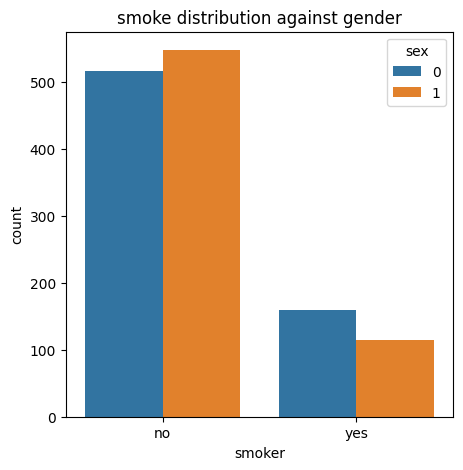

In [76]:
# show smoke distribution against gender

# show in table: display the number of male and female smokers
df_male_smoke = df[df['sex']== 'male']['smoker'].value_counts()
df_female_smoke = df[df['sex']== 'female']['smoker'].value_counts()

# group them by sex and show in table
df_smoke = df.groupby(['sex', 'smoker'])['age'].count().reset_index()
df_smoke = df_smoke.rename(columns={'age': 'count'})
display(df_smoke)

# show in plot
sns.barplot(df_smoke, x = 'smoker', y = 'count', hue = 'sex')
plt.title('smoke distribution against gender')
plt.xticks(ticks = [0,1], labels=['no', 'yes'])

We can see from the above plot that in terms of people who don't smoke, female have greater value than male. In terms of people who smoke, male have greater value than female. In conclution: there are more man smoke than woman.

,age,smoker,count
0,"(0, 18]",0.0,58
1,"(0, 18]",1.0,11
2,"(18, 50]",0.0,723
3,"(18, 50]",1.0,188
4,"(50, 100]",0.0,282
5,"(50, 100]",1.0,74


([<matplotlib.axis.XTick at 0x7fbf25ac36d0>,
 [Text(0, 0, 'no'), Text(1, 0, 'yes')])

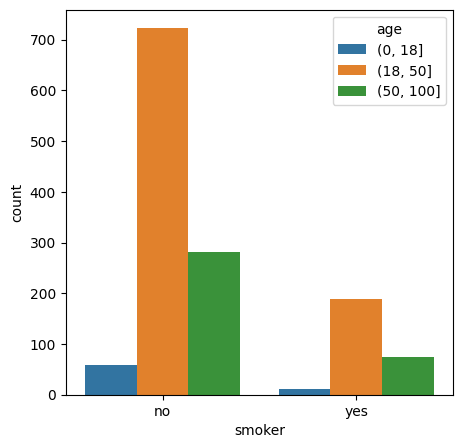

In [78]:
# smoke distribution against age

# show in table 
df_smoke = pd.cut(df['age'],[0,18,50,100]).reset_index()
df_smoke['smoker'] = df['smoker']

df1 = df_smoke.groupby(['age', 'smoker']).count().reset_index()
df2 = df1.rename(columns={'index': 'count'})
display(df2)

# show in plot
sns.barplot(df2, x = 'smoker', y = 'count', hue = 'age')
plt.xticks(ticks = [0,1], labels=['no', 'yes'])

We can see from the above plots that female smoke less than male. Also, in terms of age, people from 18 to 50 smoke the most, followed by people from 50-100, people who are under 18 smoke the least.

### c) Perform feature selection (20 points)

Select the predictors for predicting the 'charges' target variable using multicollinearity, correlation analysis, backward feature selection, forward feature selection, and lasso regression models.

In [34]:
# Before analyzing the relationship among variables, we need to use numeric variables to replace the categorial ones
df['sex'].replace(['male', 'female'],[0, 1], inplace = True)
df['smoker'].replace(['no', 'yes'],[0, 1], inplace = True)
df['region'].replace(['southwest', 'southeast', 'northwest', 'northeast'],[1, 2, 3, 4], inplace = True)
# diplay the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [68]:
# Multicollinearity

# calculating VIF for each feature
X_variables = df[['age','sex','bmi','children','smoker','region']]
display(X_variables)

vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]

print(vif_data)

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3
1334,18,1,31.920,0,0,4
1335,18,1,36.850,0,0,2
1336,21,1,25.800,0,0,1


    feature        VIF
0       age   7.974331
1       sex   1.927576
2       bmi  10.068369
3  children   1.802684
4    smoker   1.254601
5    region   4.865087


Firstly, we use Multicollinearity to check the relationship between variables. We can see from the above table age and bmi has VIFs of 7.9 and 10, therefore these two attributes may have a Multicollinearity. Since bmi has a Multicollinearity greater thant 10, we can delete it when we analyze the dataset.

<AxesSubplot: >

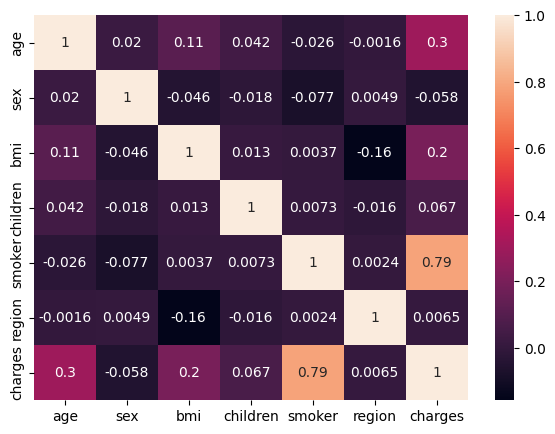

In [35]:
# Correlation analysis
cor = df.corr()
plt.figure(figsize = (7,5))
sns.heatmap(data = cor, annot = True)

In [36]:
cor_target = abs(cor["charges"])
relevant_features = cor_target[cor_target > 0.1]
relevant_features

age        0.298308
bmi        0.198401
smoker     0.787234
charges    1.000000
Name: charges, dtype: float64

By using Correlation analysis, we can see that the feature most related to 'charges' is 'smoker', it has a correlation with 'charges' of 0.79. Therefore, we can delete the attribute 'smoker' in the following analysis.

In [84]:
# Backward feature selection
X = df.drop("charges",1)
y = df["charges"]

X_1 = sm.add_constant(X)
modelOls = sm.OLS(y,X_1).fit()

In [85]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['age', 'bmi', 'children', 'smoker', 'region']


By using Backward Elimination, we can see that the top 5 features related to 'charges' are age, bmi, children, smoker and region.

In [40]:
# Forward feature selection
selected_features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

for feature in X.columns:
    selected_features.append(feature)
    f_values, _ = f_regression(X[selected_features], y)
    print(feature, f_values[-1])

age 130.4029713698979
sex 4.513038425520704
bmi 54.70271486337916
children 6.09032649938754
smoker 2175.7368631272107
region 0.057217194840914885


In [41]:
best_feature = X.columns[np.argmax(f_values)]
print(best_feature)

smoker


By using Forward feature selection, we can see that the feature most related to 'charges' is smoker, followed by age and bmi.

In [81]:
# Lasso regression
regLasso = LassoCV()
regLasso.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % regLasso.alpha_)
print("Best score using built-in LassoCV: %f" %regLasso.score(X,y))
coef = pd.Series(regLasso.coef_, index = X.columns)

Best alpha using built-in LassoCV: 50.698885
Best score using built-in LassoCV: 0.750408


In [82]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 5 variables and eliminated the other 1 variables


In [83]:
coef

age           257.079621
sex             0.000000
bmi           329.671499
children      443.279429
smoker      23496.837340
region        309.864056
dtype: float64

By using Lasso regression, we can see that the feature most related to 'charges' is smoker.

#### We can see from the above analysis that by using differnet methods, the result of feature selection is different, therefore in our analysis it's really important to choose the proper methods according to the different datasets.